# Unit 3: Deep Q-Learning with Atari Games 👾 using RL Baselines3 Zoo

In this notebook, **you'll train a Deep Q-Learning agent** playing Space Invaders using [RL Baselines3 Zoo](https://github.com/DLR-RM/rl-baselines3-zoo), a training framework based on [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) that provides scripts for training, evaluating agents, tuning hyperparameters, plotting results and recording videos.

❓ If you have questions, please post them on #study-group-unit3 discord channel 👉 https://discord.gg/aYka4Yhff9

🎮 Environments: 
- SpacesInvadersNoFrameskip-v4

📚 RL-Library: [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)
 
⬇️ Here is an example of what **you will achieve** ⬇️

In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/ThomasSimonini/ppo-SpaceInvadersNoFrameskip-v4/resolve/main/replay.mp4" type="video/mp4"></video>

## Objectives of this notebook 🏆
At the end of the notebook, you will:
- Be able to understand deeper **how RL Baselines3 Zoo works**.
- Be able to **push your trained agent and the code to the Hub** with a nice video replay and an evaluation score 🔥.




## This notebook is from Deep Reinforcement Learning Class



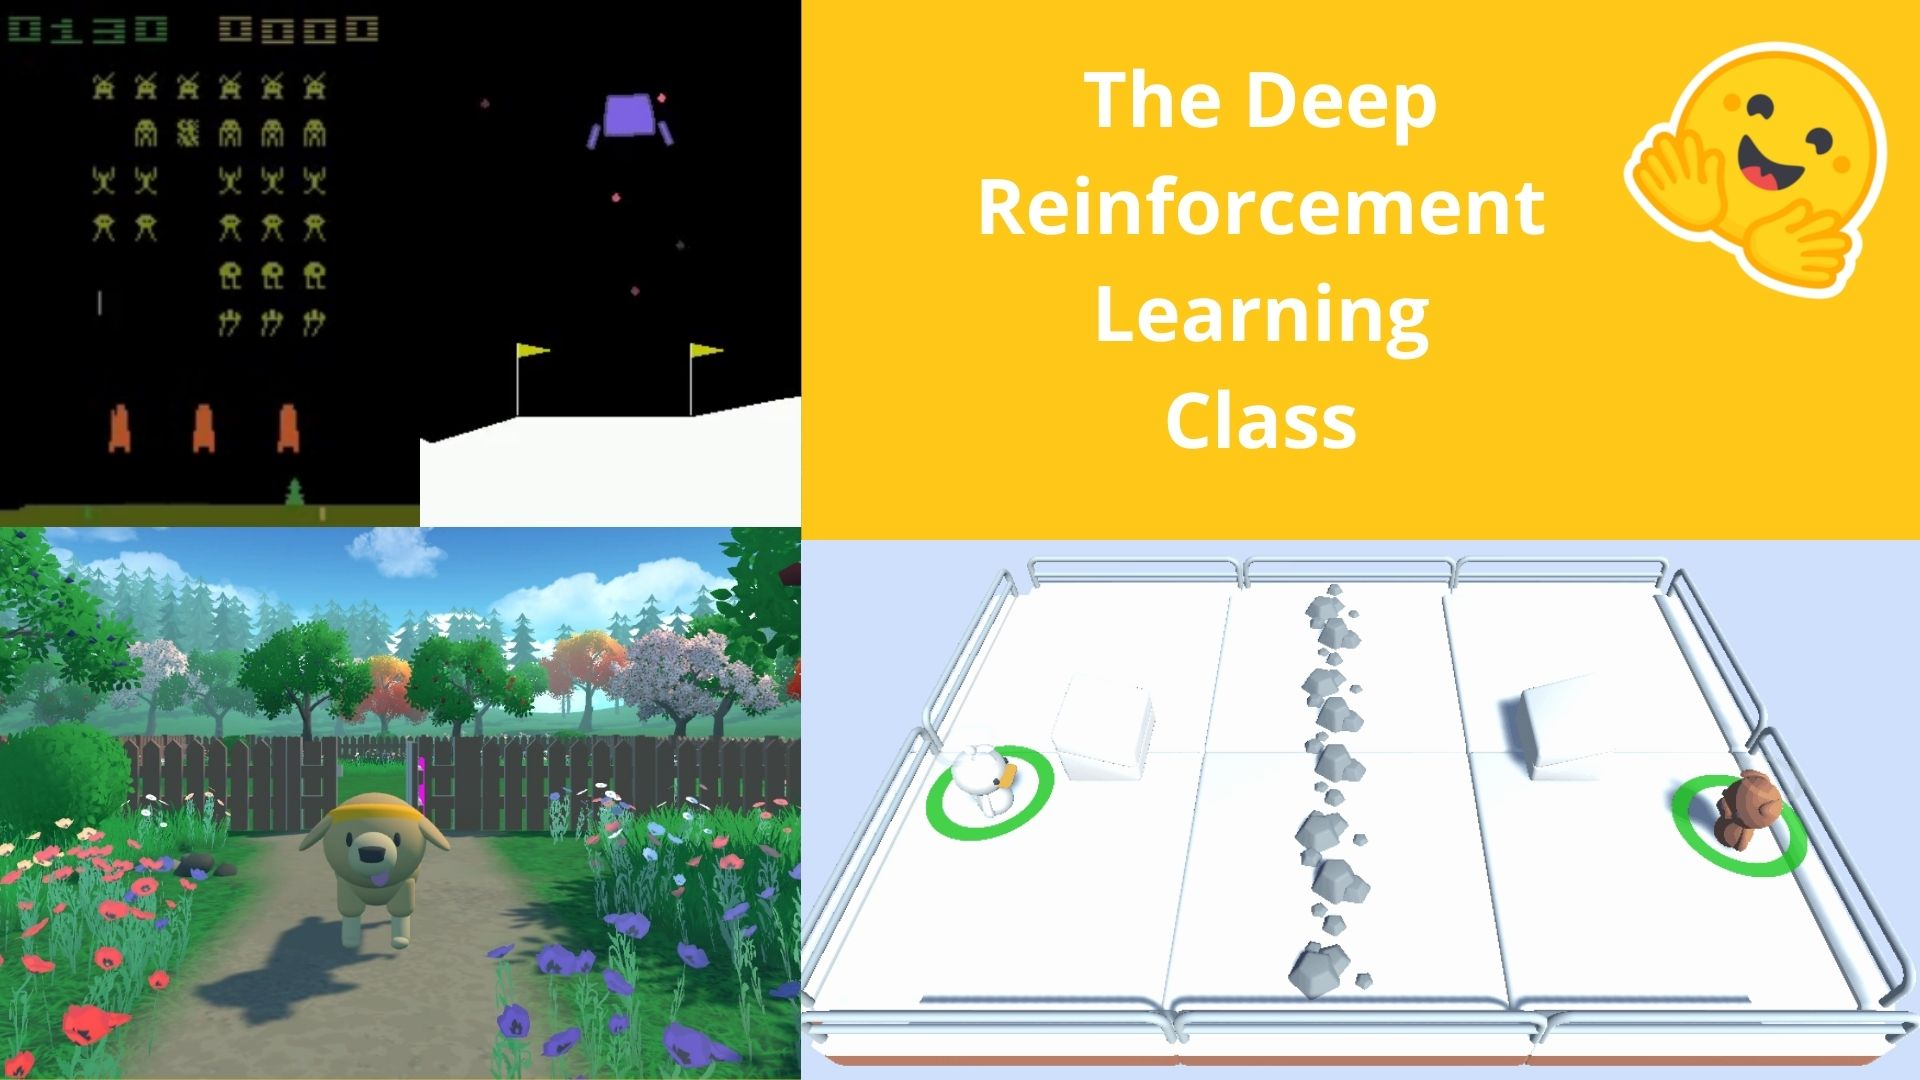

In this free course, you will:

- 📖 Study Deep Reinforcement Learning in **theory and practice**.
- 🧑‍💻 Learn to **use famous Deep RL libraries** such as Stable Baselines3, RL Baselines3 Zoo, and RLlib.
- 🤖 Train **agents in unique environments** 

And more check 📚 the syllabus 👉 https://github.com/huggingface/deep-rl-class

The best way to keep in touch is to join our discord server to exchange with the community and with us 👉🏻 https://discord.gg/aYka4Yhff9

## Prerequisites 🏗️
Before diving into the notebook, you need to:

🔲 📚 [Read the Unit 3 Readme](https://github.com/huggingface/deep-rl-class/blob/main/unit3/README.md) that contains all the information.

🔲 📚 [Read **Deep Q-Learning**](https://huggingface.co/blog/deep-rl-dqn) 

🔲 📢 Sign up to [our Discord Server](https://discord.gg/aYka4Yhff9) if it's not already done and **introduce yourself to #introduce-yourself channel 🥳**

🔲 🐕 Are you new to Discord? Check our **discord 101 to get the best practices** 👉 https://github.com/huggingface/deep-rl-class/blob/main/DISCORD.Md


# Let's train a Deep Q-Learning agent playing Atari' Space Invaders 👾 and upload it to the Hub.

### Step 0: Set the GPU 💪
- To **faster the agent's training, we'll use a GPU** to do that go to `Runtime > Change Runtime type`
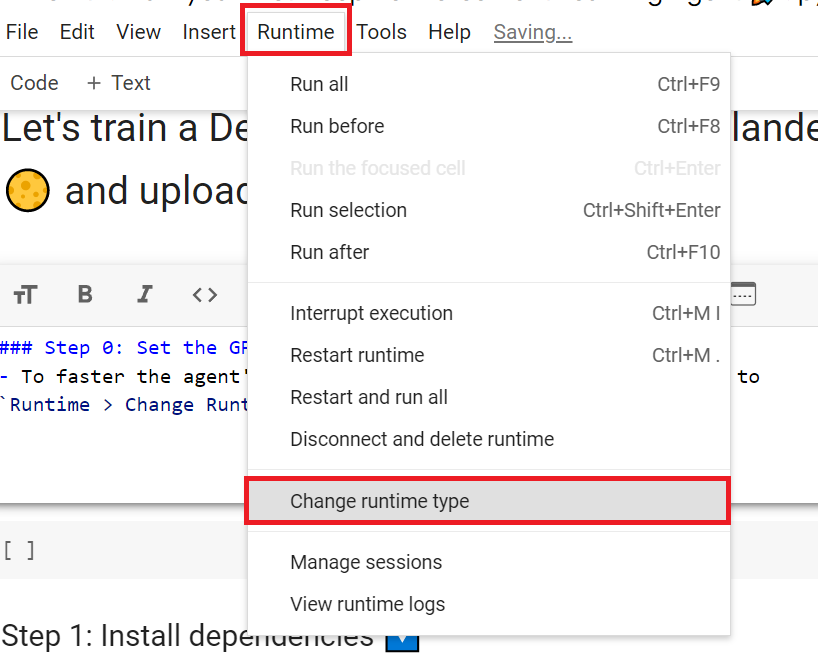


- `Hardware Accelerator > GPU`

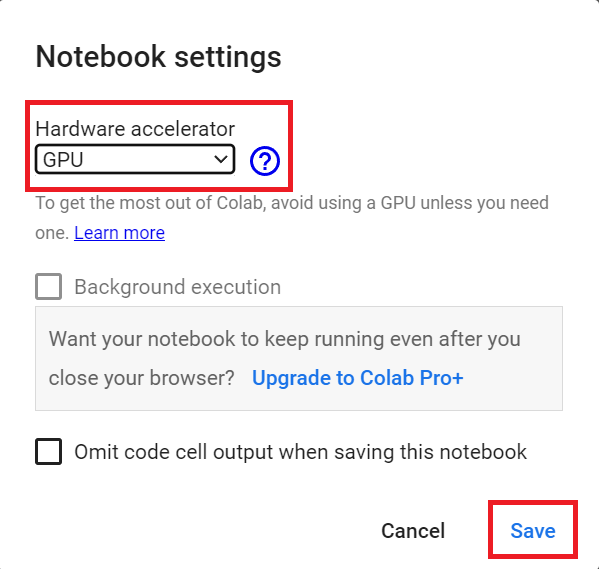

### Step 0+: Setup a Virtual Display 💻

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames). 

Hence the following cell will install virtual screen libraries and create and run a virtual screen 🖥

In [ ]:
%%capture
!pip install pyglet==1.5.1 
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

# Additional dependencies for RL Baselines3 Zoo
!apt-get install swig cmake freeglut3-dev 

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

### Step 1: Clone RL-Baselines3 Zoo Repo 📚

In [ ]:
!git clone https://github.com/DLR-RM/rl-baselines3-zoo

### Step 2: Install dependencies 🔽
The first step is to install the dependencies RL-Baselines3 Zoo needs (this can take 5min ⏲)

But we'll also install:
- `huggingface_sb3`: Additional code for Stable-baselines3 to load and upload models from the Hugging Face 🤗 Hub.

In [ ]:
%cd /content/rl-baselines3-zoo/

In [ ]:
!pip install -r requirements.txt

In [ ]:
%%capture
!pip install huggingface_sb3

### Step 3: Train our Deep Q-Learning Agent to Play Space Invaders 👾

To train an agent with RL-Baselines3-Zoo, we just need to do two things:
1. We define the hyperparameters in `rl-baselines3-zoo/hyperparams/dqn.yml`



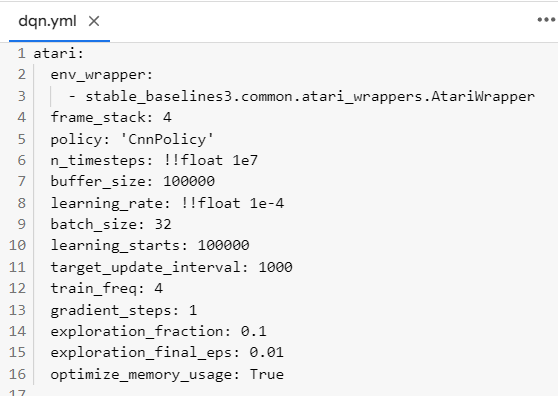

Here we see that:
- We use the Atari Wrapper that preprocess the input (Frame reduction ,grayscale, stack 4 frames)
- We use `CnnPolicy`, since we use Convolutional layers to process the frames
- We train it for 1 million `n_timesteps` 
- Memory (Experience Replay) size is 100000

You can check the documentation to understand what each hyperparameters does: https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html?highlight=deep%20q%20learning#parameters

2. We run `train.py` and save the models on `logs` folder 📁

In [ ]:
!python train.py --algo dqn --n-timesteps 3000000 --env SpaceInvadersNoFrameskip-v4  -f logs/

#### Solution

In [ ]:
!python train.py --algo dqn  --env SpaceInvadersNoFrameskip-v4 -f logs/

### Step 4: Let's evaluate our agent 👀
- RL-Baselines3-Zoo provides `enjoy.py` to evaluate our agent.
- Let's evaluate it for 5000 timesteps 🔥

In [ ]:
!python enjoy.py  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --no-render  --n-timesteps 5000  --folder logs/

#### Solution

In [ ]:
!python enjoy.py  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --no-render  --n-timesteps 5000  --folder logs/

### Step 5: Publish our trained model on the Hub 🚀
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.


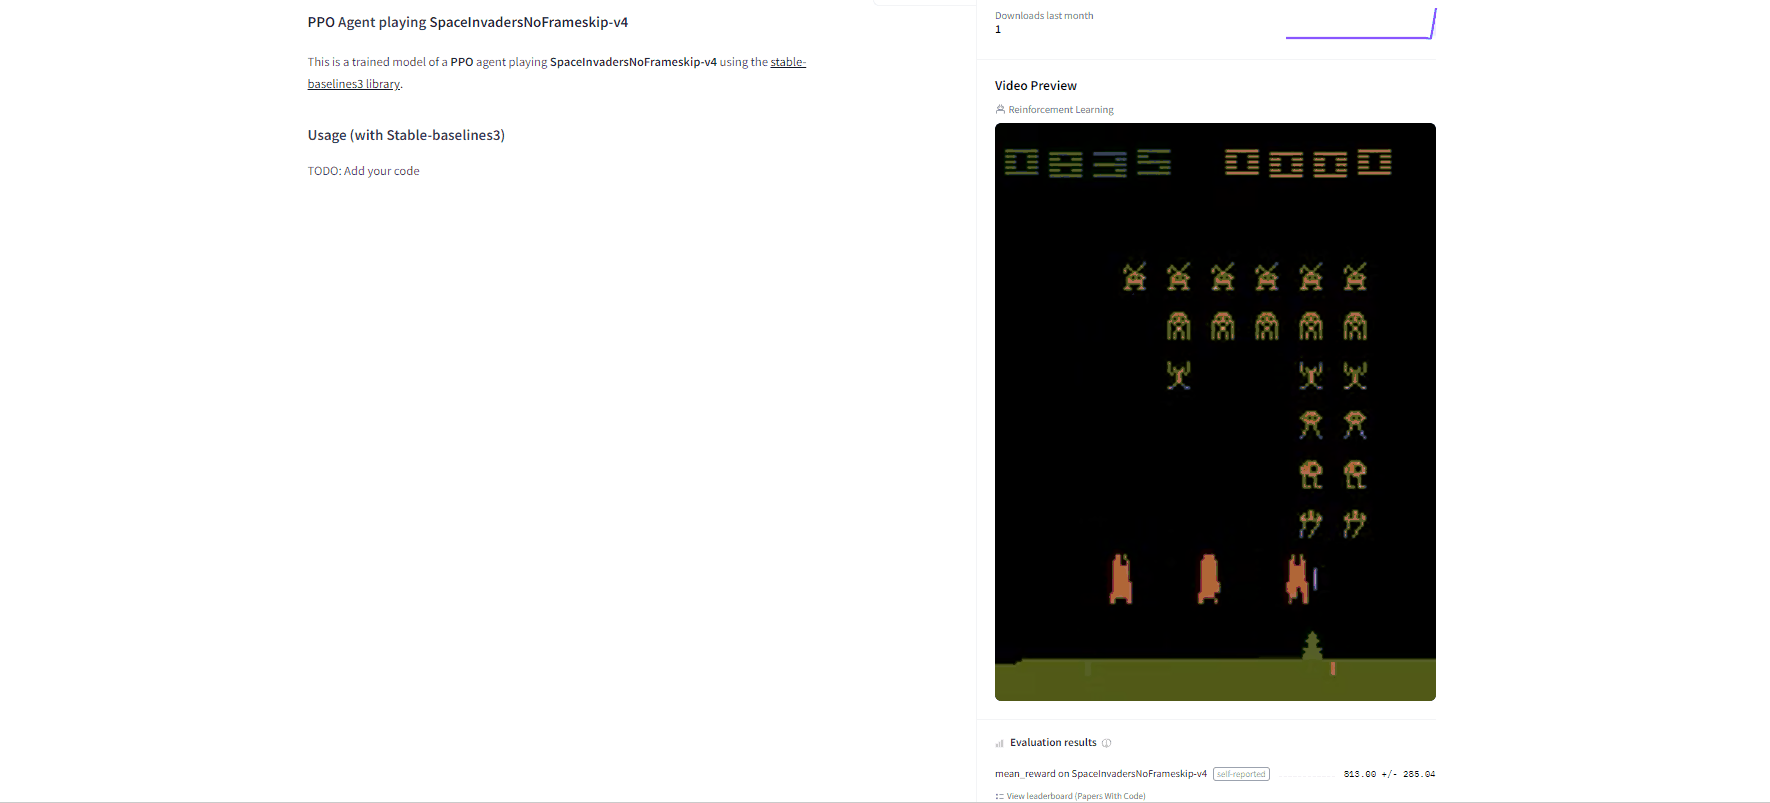

By using `utils.push_to_hub.py` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉  https://huggingface.co/spaces/chrisjay/Deep-Reinforcement-Learning-Leaderboard

To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account to HF ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

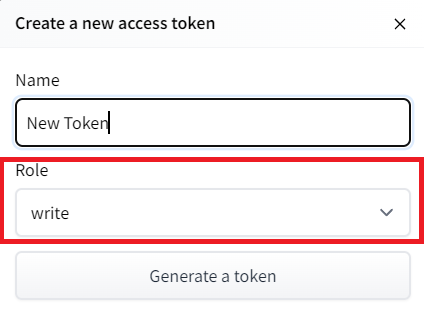

- Copy the token 
- Run the cell below and past the token

In [ ]:
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.
notebook_login()
!git config --global credential.helper store

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥

Let's run push_to_hub.py file to upload our trained agent to the Hub.

`--repo-name `: The name of the repo

`-orga`: Your Hugging Face username

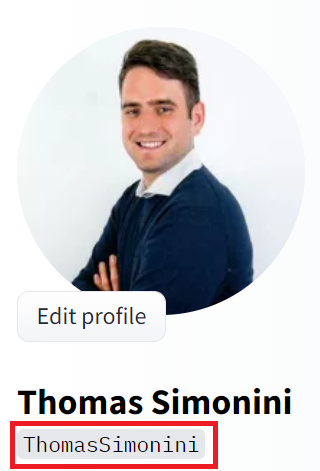

In [ ]:
!python -m utils.push_to_hub  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --repo-name dqn-SpaceInvadersNoFrameskip-v4 -orga XGBooster -f logs/

#### Solution

In [ ]:
!python -m utils.push_to_hub  --algo dqn  --env SpaceInvadersNoFrameskip-v4  --repo-name dqn-SpaceInvadersNoFrameskip-v4  -orga ThomasSimonini  -f logs/

###.

Congrats 🥳 you've just trained and uploaded your first Deep Q-Learning agent using RL-Baselines-3 Zoo. The script above should have displayed a link to a model repository such as https://huggingface.co/ThomasSimonini/dqn-SpaceInvadersNoFrameskip-v4. When you go to this link, you can:
* see a video preview of your agent at the right. 
* click "Files and versions" to see all the files in the repository.
* click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
* a model card (`README.md` file) which gives a description of the model and the hyperparameters you used.

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

Compare the results of your LunarLander-v2 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/chrisjay/Deep-Reinforcement-Learning-Leaderboard

### Step 6: Load a powerful trained model 🔥
- The Stable-Baselines3 team uploaded **more than 150 trained Deep Reinforcement Learning agents on the Hub**.

You can find them here: 👉 https://huggingface.co/sb3

Some examples:
- Asteroids: https://huggingface.co/sb3/dqn-AsteroidsNoFrameskip-v4
- Beam Rider: https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4
- Breakout: https://huggingface.co/sb3/dqn-BreakoutNoFrameskip-v4
- Road Runner: https://huggingface.co/sb3/dqn-RoadRunnerNoFrameskip-v4

Let's load an agent playing Beam Rider: https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4

In [ ]:
%%html
<video controls autoplay><source src="https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4/resolve/main/replay.mp4" type="video/mp4"></video>

1. We download the model using `utils.load_from_hub`, and place it in a new folder that we can call `rl_trained`

In [ ]:
# Download model and save it into the logs/ folder
!python -m utils.load_from_hub --algo dqn --env BeamRiderNoFrameskip-v4 -orga sb3 -f rl_trained/

2. Let's evaluate if for 5000 timesteps

In [ ]:
!python enjoy.py --algo dqn --env BeamRiderNoFrameskip-v4 -n 5000  -f rl_trained/

Why not trying to train your own **Deep Q-Learning Agent playing BeamRiderNoFrameskip-v4? 🏆.**

If you want to try, check https://huggingface.co/sb3/dqn-BeamRiderNoFrameskip-v4#hyperparameters **in the model card, you have the hyperparameters of the trained agent.**

We'll see in the next Unit, how we can **use Optuna for optimizing the Hyperparameters 🔥.**


## Some additional challenges 🏆
The best way to learn **is to try things by your own**!

In the [Leaderboard](https://huggingface.co/spaces/chrisjay/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here's a list of environments you can try to train your agent with:
- BeamRiderNoFrameskip-v4
- BreakoutNoFrameskip-v4 
- EnduroNoFrameskip-v4
- PongNoFrameskip-v4




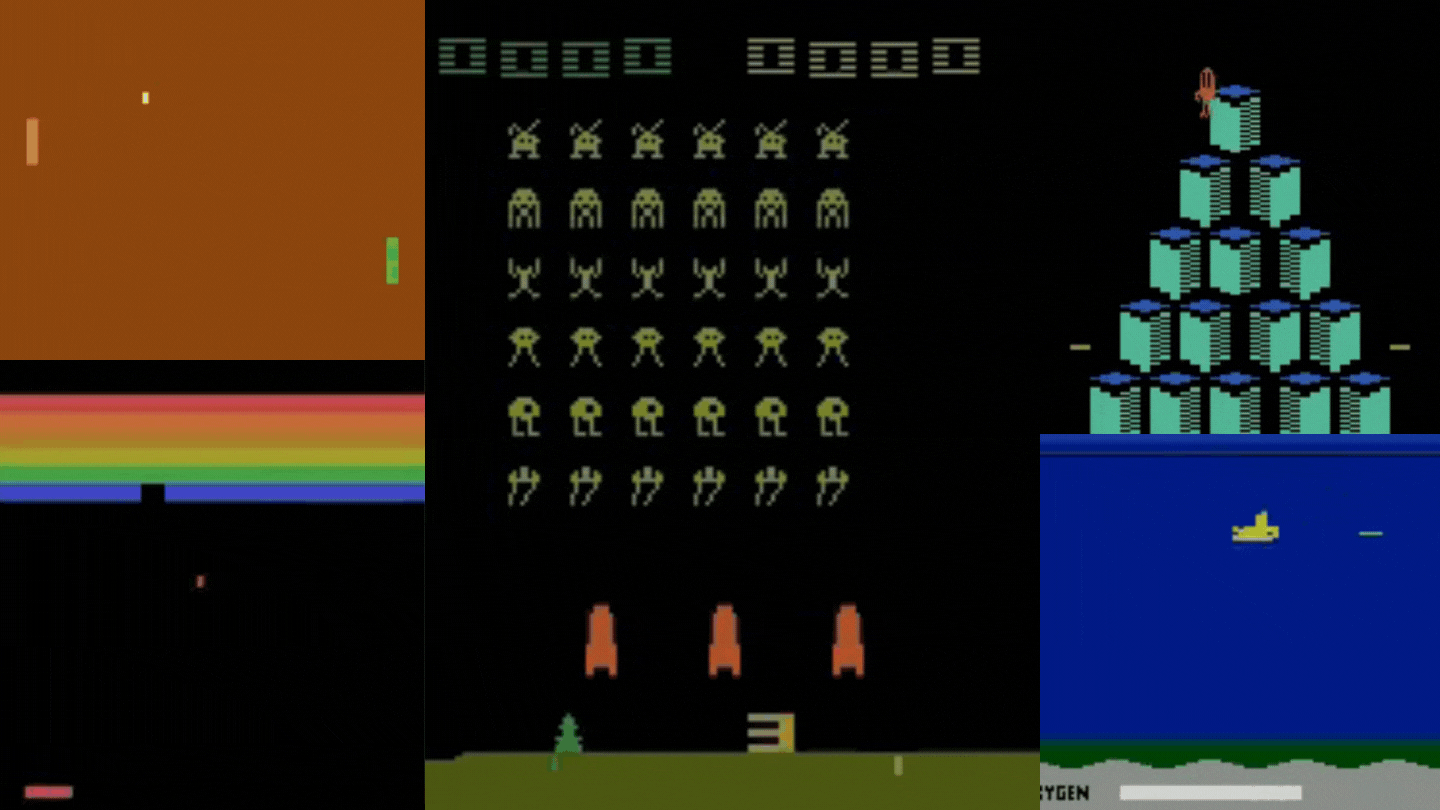

________________________________________________________________________
Congrats on finishing this chapter!

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and having a solid foundations.





### This is a course built with you 👷🏿‍♀️

Finally, we want to improve and update the course iteratively with your feedback. If you have some, please fill this form 👉 https://forms.gle/3HgA7bEHwAmmLfwh9


### Keep Learning, Stay Awesome 🤗